#### 【Task4(2天)】用PyTorch实现多层网络(给代码截图参考)
1. 引入模块，读取数据
2. 构建计算图（构建网络模型）
3. 损失函数与优化器
4. 开始训练模型
5. 对训练的模型预测结果进行评估

In [2]:
import torch 
import torchvision
import torch.nn as nn
import torch.utils.data as Data
import os 
import numpy as np
import matplotlib.pyplot as plt

设定参数

In [3]:
EPOCH = 1
BATCH_SIZE = 32
LR = 0.001
DOWLOAD_MNIST = True



下載mnist數據,并且拿出來看一下

C:\Users\Kakak\Anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\Kakak\Anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000])


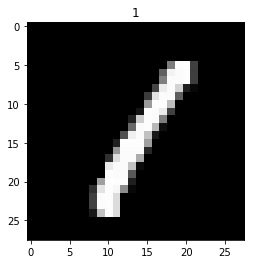

In [8]:
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWLOAD_MNIST,
)

print(train_data.train_data.size())
print(train_data.train_labels.size()) 
plt.imshow(train_data.train_data[3].numpy(),cmap='gray')
plt.title('%i'%train_data.train_labels[3])
plt.show()

In [14]:
train_data.train_data[2]

C:\Users\Kakak\Anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  62,  81,   0,   

使用數據迭代器

In [9]:
train_loader = Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)

獲取測試數據

In [24]:
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000].cuda()/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000].cuda()

C:\Users\Kakak\Anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\Kakak\Anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


C:\Users\Kakak\Anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([7, 2])

定义网络

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=16,
                      kernel_size=5,
                      stride=1,
                      padding=2,),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),   
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),)
        self.conv3 = nn.Sequential(
            nn.Conv2d(32,64,5,1,2),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),)
        self.out = nn.Linear(64*7*7,10)
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0),-1)
        output = self.out(x)
        return output,x
        
        

In [25]:
cnn = CNN()
cnn.cuda()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (out): Linear(in_features=3136, out_features=10, bias=True)
)


In [32]:
optimizer = torch.optim.Adam(cnn.parameters(),lr=LR)
loss_func = nn.CrossEntropyLoss()


for epoch in range(EPOCH):
    for step,(b_x,b_y) in enumerate(train_loader):
        b_x = b_x.cuda()
        b_y = b_y.cuda()
        output = cnn(b_x)[0]
        loss = loss_func(output,b_y)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        if step%500==0:
            test_output,last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].cuda().data 
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.2f' % accuracy)
            
            
            

test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].cuda().data
print(pred_y, 'prediction number')
print(test_y[:10].cpu().numpy(), 'real number')

Epoch:  0 | train loss: 0.0015 | test accuracy: 0.99
Epoch:  0 | train loss: 0.0950 | test accuracy: 0.99
Epoch:  0 | train loss: 0.0189 | test accuracy: 0.99
Epoch:  0 | train loss: 0.1540 | test accuracy: 0.99
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], device='cuda:0') prediction number
[7 2 1 0 4 1 4 9 5 9] real number
